Using TensorFlow backend.


done
done
(100000, 28, 28, 1)
(100000, 28, 28, 1)


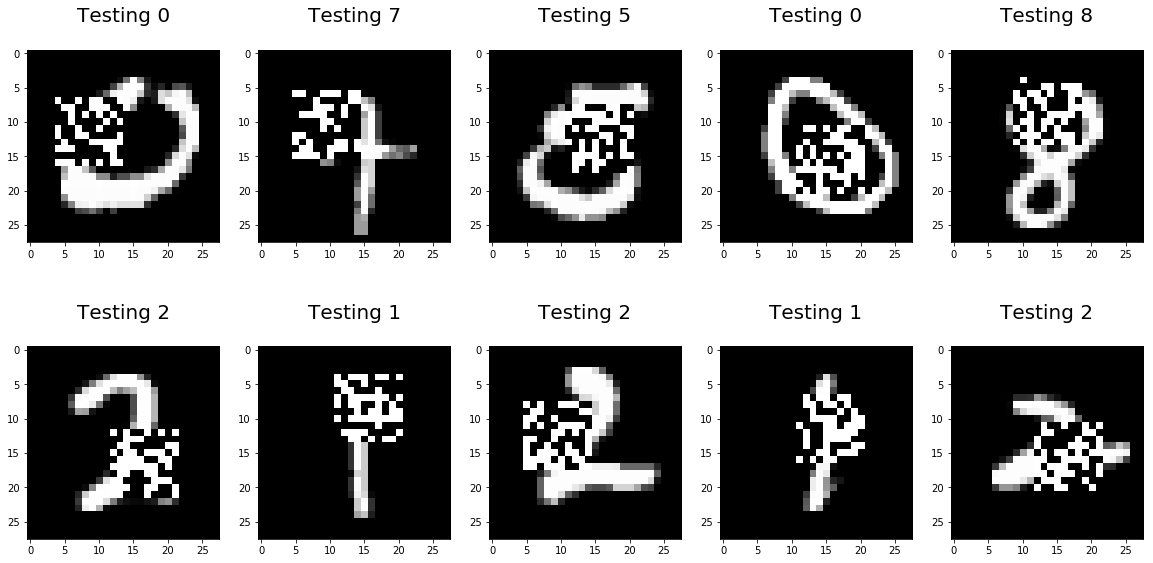

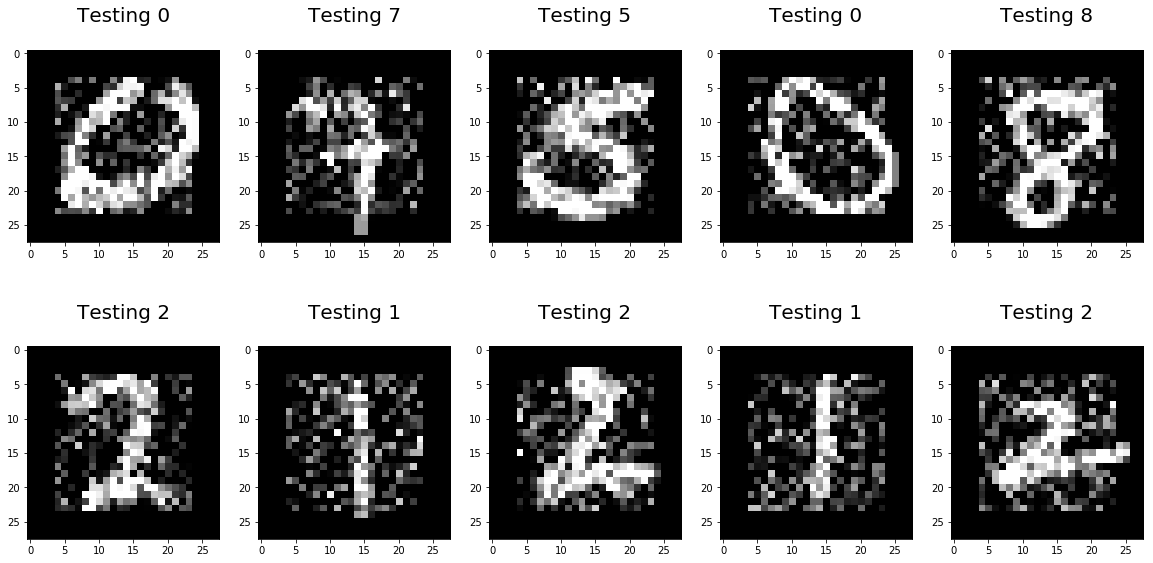

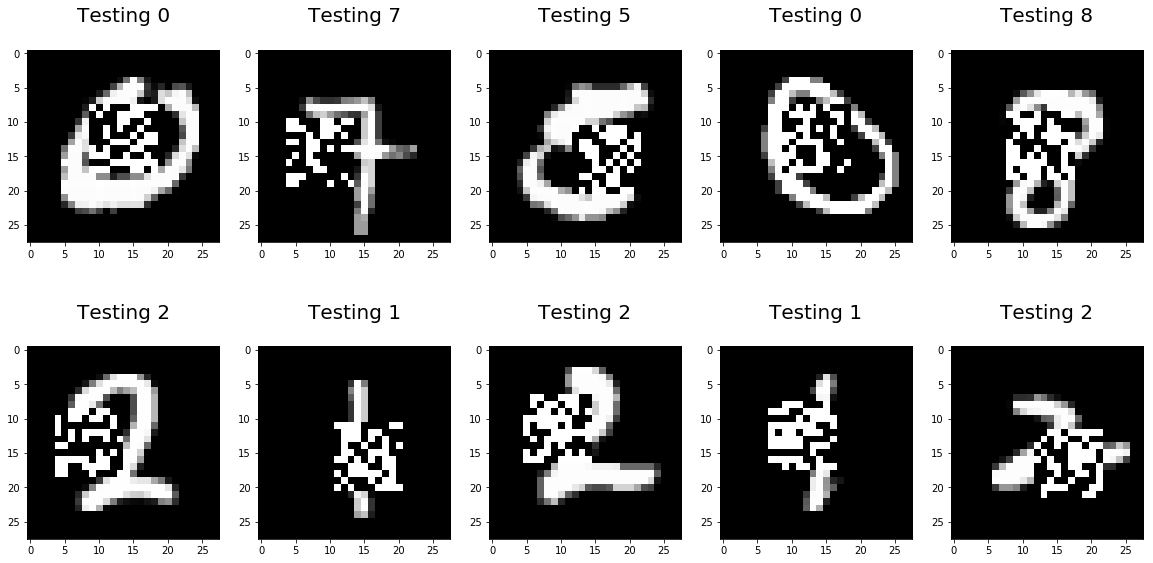

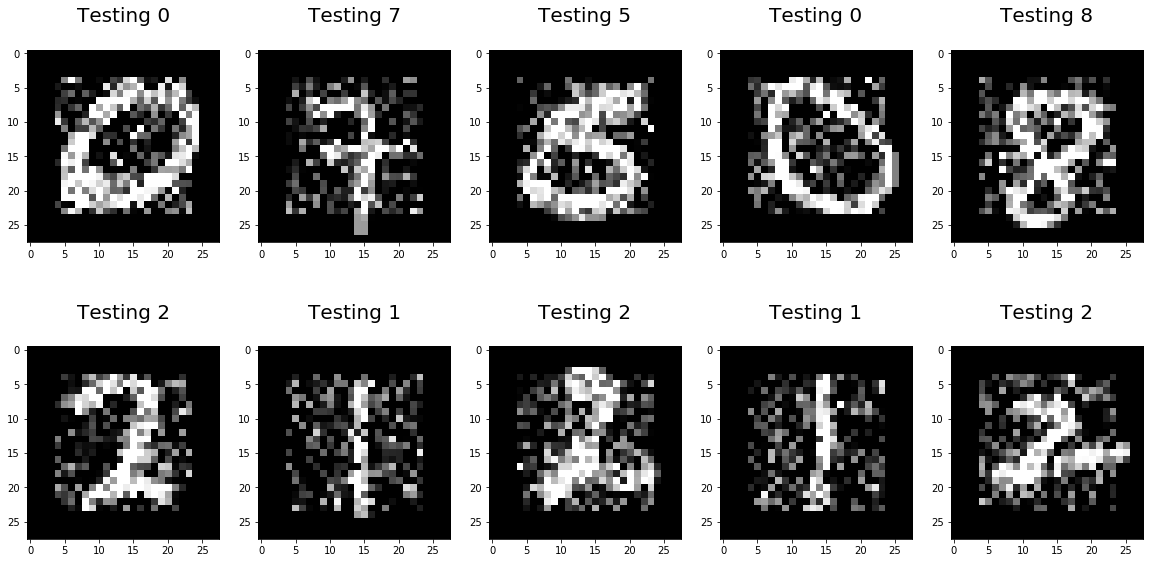

In [1]:
from scipy.io import loadmat
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,UpSampling2D
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau

from scipy.io import loadmat
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,UpSampling2D
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau


data_path = "./data.mat"
data_raw = loadmat(data_path)

train_img = data_raw["train_img"]
test_img = data_raw["test_img"]
train_lbl = data_raw["train_lbl"]

#reshape into 28 by 28 matrixes


train=np.reshape(train_img, (50000,28,28))
test=np.reshape(test_img, (20000,28,28))



train1=np.array(train, copy=True)


#generate sub-training set 1,in which the stain effect on the image is considered
for i in train1:
    stain=np.empty((10,10),dtype=int)
    a = np.random.random((10,10))
    stain[a>=0.5]=255;
    stain[a<0.5]=0;
    d=np.random.randint(0,9, size=(2))
    i[(4+d[0]):(14+d[0]),(4+d[1]):(14+d[1])]=stain



plt.figure(figsize=(20,10))
for index, (image, label) in enumerate(zip(train1[0:10], train_lbl[0:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title('Testing %i\n' % label, fontsize = 20)


#generate sub-training set 2,in which the gussian noise effect on the image is considered
#when add noise, the orginal uint8 format would includes warpperaround which we want to avoid, thereby
#I convert the array into int32, any after the addition with gassuian noise in terms of each element of the array
#I config the pixel value larger than 255 as 255， which of that are lower than 0 as 0.
train2=np.array(train, copy=True)  
train2=np.array(train2,dtype=int)
for i in train2:
    a=np.random.normal(0, 100, (20,20))
    a=a.astype(int)
    i[4:24,4:24]=i[4:24,4:24]+a
    i[i>=255]=255
    i[i<=0]=0
#this conversion of adding noise only take roughly 20s at my pc end
print("done") 



##plot the frist 10 graph to check
train2=np.array(train2,dtype='uint8')
plt.figure(figsize=(20,10))
for index, (image, label) in enumerate(zip(train2[0:10], train_lbl[0:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title('Testing %i\n' % label, fontsize = 20)
    


train_o=np.array(train,  copy=True)
train_o=train_o/255
train_o = np.reshape(train_o,(-1,28,28,1))
train1=train1/255
train1=np.reshape(train1,(-1,28,28,1))
train2=train2/255
train2=np.reshape(train2,(-1,28,28,1))
                      
test = np.reshape(test,(-1,28,28,1))
test=test/255    
#combine subset 1 and subset 2 to form a new big training set 
train=np.concatenate((train_o,train1, train2), axis=0)
train_l=np.concatenate((train_lbl,train_lbl, train_lbl), axis=0)
train.shape

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
#reshape image in 3 dimensions: height=28,width=1, cacal=1


#encode labels to hot vectors, e.g. 3->[0,0,0,1,0,0,0,0,0,0]
train_l = to_categorical(train_l , num_classes = 10)
train_l.shape
random_seed=3
x_trn, x_tst, y_trn,y_tst = train_test_split(train, train_l, test_size = 0.2, random_state=random_seed)
data_path = "./data.mat"
data_raw = loadmat(data_path)

train_img = data_raw["train_img"]
test_img = data_raw["test_img"]
train_lbl = data_raw["train_lbl"]

#reshape into 28 by 28 matrixes


train=np.reshape(train_img, (50000,28,28))
test=np.reshape(test_img, (20000,28,28))



train1=np.array(train, copy=True)


#generate sub-training set 1,in which the stain effect on the image is considered
for i in train1:
    stain=np.empty((10,10),dtype=int)
    a = np.random.random((10,10))
    stain[a>=0.5]=255;
    stain[a<0.5]=0;
    d=np.random.randint(0,9, size=(2))
    i[(4+d[0]):(14+d[0]),(4+d[1]):(14+d[1])]=stain



plt.figure(figsize=(20,10))
for index, (image, label) in enumerate(zip(train1[0:10], train_lbl[0:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title('Testing %i\n' % label, fontsize = 20)


#generate sub-training set 2,in which the gussian noise effect on the image is considered
#when add noise, the orginal uint8 format would includes warpperaround which we want to avoid, thereby
#I convert the array into int32, any after the addition with gassuian noise in terms of each element of the array
#I config the pixel value larger than 255 as 255， which of that are lower than 0 as 0.
train2=np.array(train, copy=True)  
train2=np.array(train2,dtype=int)
for i in train2:
    a=np.random.normal(0, 100, (20,20))
    a=a.astype(int)
    i[4:24,4:24]=i[4:24,4:24]+a
    i[i>=255]=255
    i[i<=0]=0
#this conversion of adding noise only take roughly 20s at my pc end
print("done") 



##plot the frist 10 graph to check
train2=np.array(train2,dtype='uint8')
plt.figure(figsize=(20,10))
for index, (image, label) in enumerate(zip(train2[0:10], train_lbl[0:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title('Testing %i\n' % label, fontsize = 20)
    


train_o=np.array(train,  copy=True)
train_o=train_o/255
train_o = np.reshape(train_o,(-1,28,28,1))
train1=train1/255
train1=np.reshape(train1,(-1,28,28,1))
train2=train2/255
train2=np.reshape(train2,(-1,28,28,1))
                      
test = np.reshape(test,(-1,28,28,1))
test=test/255    
#combine subset 1 and subset 2 to form a new big training set 
train=np.concatenate((train1, train2), axis=0)

train_l=np.concatenate((train_o, train_o), axis=0)

print(train.shape)
print(train_l.shape)
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
#reshape image in 3 dimensions: height=28,width=1, cacal=1


#encode labels to hot vectors, e.g. 3->[0,0,0,1,0,0,0,0,0,0]
#train_l = to_categorical(train_l , num_classes = 10)
#train_l.shape



In [31]:
#train = np.reshape(train,(-1,784))
#train_l = np.reshape(train_l,(-1,784))
random_seed=3
#x_trn, x_tst, y_trn,y_tst = train_test_split(train, train_l, test_size = 0.2, random_state=random_seed)

x_trn, y_trn = train_test_split(train_o, test_size = 0.2, random_state=random_seed)

In [22]:
random_seed=3
x_o, j = train_test_split(train_o, test_size = 0.2, random_state=random_seed)
print(x_clean.shape)
x_noise1, a, x_clean1,b = train_test_split(train1,train_o, test_size = 0.2, random_state=random_seed)

x_noise2, c,x_clean2,d = train_test_split(train2,train_o, test_size = 0.6, random_state=random_seed)


x_noise=np.concatenate((x_noise1,x_noise2), axis=0)
x_clean=np.concatenate((x_clean1,x_clean2), axis=0)

x_compound=np.concatenate((x_o,x_noise),axis=0)

print(x_compound.shape)

x_trn, y_trn = train_test_split(x_compound, test_size = 0.2, random_state=random_seed)


(60000, 28, 28, 1)
(100000, 28, 28, 1)


In [ ]:
class CustomVariationalLayer(Layer):
    def __init__(self, **kwargs):
        self.is_placeholder = True
        super(CustomVariationalLayer, self).__init__(**kwargs)

    def vae_loss(self, x, x_decoded_mean_squash):
        x = K.flatten(x)
        x_decoded_mean_squash = K.flatten(x_decoded_mean_squash)
        xent_loss = img_rows * img_cols * metrics.binary_crossentropy(x, x_decoded_mean_squash)
        kl_loss = - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean(xent_loss + kl_loss)

    def call(self, inputs):
        x = inputs[0]
        x_decoded_mean_squash = inputs[1]
        loss = self.vae_loss(x, x_decoded_mean_squash)
        self.add_loss(loss, inputs=inputs)
        # we don't use this output, but it has to have the correct shape:
        return K.ones_like(x)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from keras.layers import Input, Dense, Lambda, Flatten, Reshape, Layer
from keras.layers import Conv2D, Conv2DTranspose
from keras.models import Model
from keras import backend as K
from keras import metrics
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols, img_chns = 28, 28, 1
# number of convolutional filters to use
filters = 64
# convolution kernel size
num_conv = 3

batch_size = 20
if K.image_data_format() == 'channels_first':
    original_img_size = (img_chns, img_rows, img_cols)
else:
    original_img_size = (img_rows, img_cols, img_chns)
latent_dim = 2
intermediate_dim = 128
epsilon_std = 1.0
epochs = 10

x = Input(batch_shape=(batch_size,) + original_img_size)
conv_1 = Conv2D(img_chns,
                kernel_size=(2, 2),
                padding='same', activation='relu')(x)
conv_2 = Conv2D(filters,
                kernel_size=(2, 2),
                padding='same', activation='relu',
                strides=(2, 2))(conv_1)
conv_3 = Conv2D(filters,
                kernel_size=num_conv,
                padding='same', activation='relu',
                strides=1)(conv_2)
conv_4 = Conv2D(filters,
                kernel_size=num_conv,
                padding='same', activation='relu',
                strides=1)(conv_3)
flat = Flatten()(conv_4)
hidden = Dense(intermediate_dim, activation='relu')(flat)

z_mean = Dense(latent_dim)(hidden)
z_log_var = Dense(latent_dim)(hidden)


def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim),
                              mean=0., stddev=epsilon_std)
    return z_mean + K.exp(z_log_var) * epsilon

# note that "output_shape" isn't necessary with the TensorFlow backend
# so you could write `Lambda(sampling)([z_mean, z_log_var])`
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# we instantiate these layers separately so as to reuse them later
decoder_hid = Dense(intermediate_dim, activation='relu')
decoder_upsample = Dense(filters * 14 * 14, activation='relu')

if K.image_data_format() == 'channels_first':
    output_shape = (batch_size, filters, 14, 14)
else:
    output_shape = (batch_size, 14, 14, filters)

decoder_reshape = Reshape(output_shape[1:])
decoder_deconv_1 = Conv2DTranspose(filters,
                                   kernel_size=num_conv,
                                   padding='same',
                                   strides=1,
                                   activation='relu')
decoder_deconv_2 = Conv2DTranspose(filters, num_conv,
                                   padding='same',
                                   strides=1,
                                   activation='relu')
if K.image_data_format() == 'channels_first':
    output_shape = (batch_size, filters, 29, 29)
else:
    output_shape = (batch_size, 29, 29, filters)
decoder_deconv_3_upsamp = Conv2DTranspose(filters,
                                          kernel_size=(3, 3),
                                          strides=(2, 2),
                                          padding='valid',
                                          activation='relu')
decoder_mean_squash = Conv2D(img_chns,
                             kernel_size=2,
                             padding='valid',
                             activation='sigmoid')

hid_decoded = decoder_hid(z)
up_decoded = decoder_upsample(hid_decoded)
reshape_decoded = decoder_reshape(up_decoded)
deconv_1_decoded = decoder_deconv_1(reshape_decoded)
deconv_2_decoded = decoder_deconv_2(deconv_1_decoded)
x_decoded_relu = decoder_deconv_3_upsamp(deconv_2_decoded)
x_decoded_mean_squash = decoder_mean_squash(x_decoded_relu)


# placeholder loss
def zero_loss(y_true, y_pred):
    return K.zeros_like(y_pred)

def vae_loss(x, x_decoded_mean_squash):
    x = K.flatten(x)
    x_decoded_mean_squash = K.flatten(x_decoded_mean_squash)
    xent_loss = img_rows * img_cols * metrics.binary_crossentropy(x, x_decoded_mean_squash)
    kl_loss = - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return K.mean(xent_loss + kl_loss)
# Custom loss layer




vae = Model(x, x_decoded_mean_squash)
vae.compile(optimizer='adam', loss=vae_loss)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

vae.fit(x_trn,x_trn,
        shuffle=True,
        epochs=epochs,
        verbose=1,
        batch_size=batch_size,validation_data=(y_trn,y_trn),
       callbacks=[learning_rate_reduction])




In [24]:
prediction1 =vae.predict(x_trn,batch_size=100)

In [ ]:
encoder = Model(x, z_mean)
n=10
# display a 2D plot of the digit classes in the latent space
prediction= vae.predict(train1, batch_size=batch_size)



#test = np.reshape(test,(-1,784))
#prediction=vae.predict(train2[:n])


plt.figure(figsize=(15,10))
for i in range(n):
    
    ax1 = plt.subplot(1, n, i+1)
    plt.imshow(prediction[i].reshape(28, 28))
    plt.gray()
plt.show()    
plt.figure(figsize=(15,10))
for i in range(n):
    ax2 = plt.subplot(1, n, i+1)
    plt.imshow(train1[i].reshape(28, 28))
    plt.gray()

plt.show()

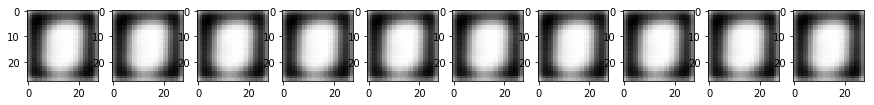

In [124]:
decoder_input = Input(shape=(latent_dim,))
_hid_decoded = decoder_hid(decoder_input)
_up_decoded = decoder_upsample(_hid_decoded)
_reshape_decoded = decoder_reshape(_up_decoded)
_deconv_1_decoded = decoder_deconv_1(_reshape_decoded)
_deconv_2_decoded = decoder_deconv_2(_deconv_1_decoded)
_x_decoded_relu = decoder_deconv_3_upsamp(_deconv_2_decoded)
_x_decoded_mean_squash = decoder_mean_squash(_x_decoded_relu)
generator = Model(decoder_input, _x_decoded_mean_squash)

x_decoded = generator.predict(prediction, batch_size=batch_size)

plt.figure(figsize=(15,10))
n=10
for i in range(n):
    
    ax1 = plt.subplot(1, n, i+1)
    plt.imshow(x_decoded[i].reshape(28, 28))
    plt.gray()
plt.show()    


In [ ]:

# build a model to project inputs on the latent space
# display a 2D plot of the digit classes in the latent space

encoder = Model(x, z_mean)

x_test_encoded = encoder.predict(x_tst, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()



In [29]:
vae.save('vae1234.h5')

In [ ]:
# build a digit generator that can sample from the learned distribution
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()

In [6]:
latent_dim = 2
intermediate_dim = 128
epsilon_std = 1.0
import keras.losses
def vae_loss(x, x_decoded_mean_squash):
    x = K.flatten(x)
    x_decoded_mean_squash = K.flatten(x_decoded_mean_squash)
    xent_loss = img_rows * img_cols * metrics.binary_crossentropy(x, x_decoded_mean_squash)
    kl_loss = - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return K.mean(xent_loss + kl_loss)
batch_size = 100
vae=load_model('fail_auto123.h5',custom_objects={'latent_dim': latent_dim, 'epsilon_std': epsilon_std,'batch_size':batch_size,'zero_loss':zero_loss,'vae_loss':vae_loss})

In [ ]:
prediction= vae.predict(train_o, batch_size=batch_size)


In [193]:
model_s=load_model('auto_noise.h5')
x1=model_s.predict(test)
print("done")


done


In [195]:
x2=vae.predict(x1, batch_size=batch_size);
print("done")

done


In [196]:
model_f=load_model('final_cnn2.h5')
prediction = model_f.predict(x2)
Y_prediction=np.argmax(prediction,axis = 1) 
print(Y_prediction)
import pandas as pd
df=pd.read_csv("Sample-Submission.csv")
df['Prediction']=Y_prediction
df.to_csv("variational_auto_compound_input.csv",index=False)
print("done")

[1 6 5 ..., 9 9 1]
done


In [38]:
from keras.models import load_model
#autoencoder=load_model('denoise.h5')
autoencoder=load_model('auto_noise.h5')
n1=10
n2=210
batch_size=100
prediction1 = autoencoder.predict(train_o[n1:n2])
prediction1 =vae.predict(prediction1,batch_size=20)
prediction2 = autoencoder.predict(train1[n1:n2])
prediction2 =vae.predict(prediction2,batch_size=20)
prediction3 = autoencoder.predict(train2[n1:n2])
prediction3 =vae.predict(prediction3,batch_size=20)
prediction4 = autoencoder.predict(train2[n1:n2])
prediction4 =vae.predict(prediction4,batch_size=20)
print('done')

done


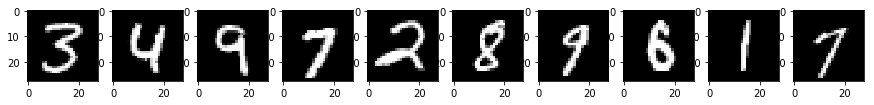

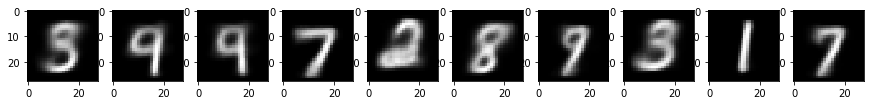

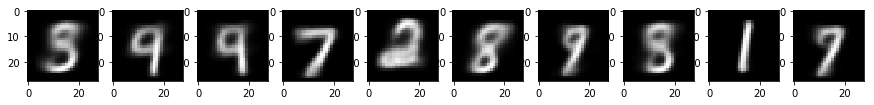

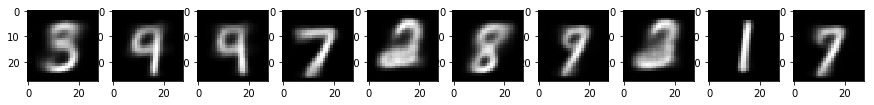

In [39]:
n=10
n1=10
#prediction_model = autoencoder.predict(train2[:n])
plt.figure(figsize=(15,10))
for i in range(n):
    
    ax1 = plt.subplot(1, n, i+1)
    plt.imshow(train_o[n1+i].reshape(28, 28))
    plt.gray()
plt.show()    
plt.figure(figsize=(15,10))
for i in range(n):
    
    ax1 = plt.subplot(1, n, i+1)
    plt.imshow(prediction1[i].reshape(28, 28))
    plt.gray()
plt.show()    
plt.figure(figsize=(15,10))
for i in range(n):
    ax2 = plt.subplot(1, n, i+1)
    plt.imshow(prediction2[i].reshape(28, 28))
    plt.gray()
plt.figure(figsize=(15,10))
for i in range(n):
    ax2 = plt.subplot(1, n, i+1)
    plt.imshow(prediction3[i].reshape(28, 28))
    plt.gray()
plt.show()